In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from config import *
import seaborn as sns

In [2]:
fname = OUTPUT_FILES+"/temporal_sd_2011_2023.csv"

In [3]:
df = pd.read_csv(fname)

In [4]:
df[df['search']=='S']
df['num'] = df['count']

In [5]:
# df_max = df.groupby('search')['count'].max()
# df_min = df.groupby('search')['count'].min()

df_mean = df.groupby('search')['count'].mean()
df_std = df.groupby('search')['count'].std()

In [6]:
# df = df.merge(df_max, how='left', on='search')
# df = df.merge(df_min, how='left', on='search')

df = df.merge(df_mean, how='left', on='search')
df = df.merge(df_std, how='left', on='search')

In [7]:
# df['num_max'] = df['count_y']
# df['num_min'] = df['count']

df['num_mean'] = df['count_y']
df['num_std'] = df['count']

In [8]:
# df['norm'] = (df['num'] - df['num_min']) / (df['num_max'] - df['num_min'])
df['norm'] = (df['num'] - df['num_mean']) / df['num_std'] 

In [9]:
df

,year,search,count_x,num,count_y,count,num_mean,num_std,norm
0,2011-2012,S,255,255,1278.666667,895.782069,1278.666667,895.782069,-1.142763
1,2012-2013,S,329,329,1278.666667,895.782069,1278.666667,895.782069,-1.060154
2,2013-2014,S,485,485,1278.666667,895.782069,1278.666667,895.782069,-0.886004
3,2014-2015,S,706,706,1278.666667,895.782069,1278.666667,895.782069,-0.639292
4,2015-2016,S,868,868,1278.666667,895.782069,1278.666667,895.782069,-0.458445
...,...,...,...,...,...,...,...,...,...
79,2018-2019,ESR,22,22,17.000000,14.746340,17.000000,14.746340,0.339067
80,2019-2020,ESR,32,32,17.000000,14.746340,17.000000,14.746340,1.017202
81,2020-2021,ESR,46,46,17.000000,14.746340,17.000000,14.746340,1.966590
82,2021-2022,ESR,39,39,17.000000,14.746340,17.000000,14.746340,1.491896


# All sets

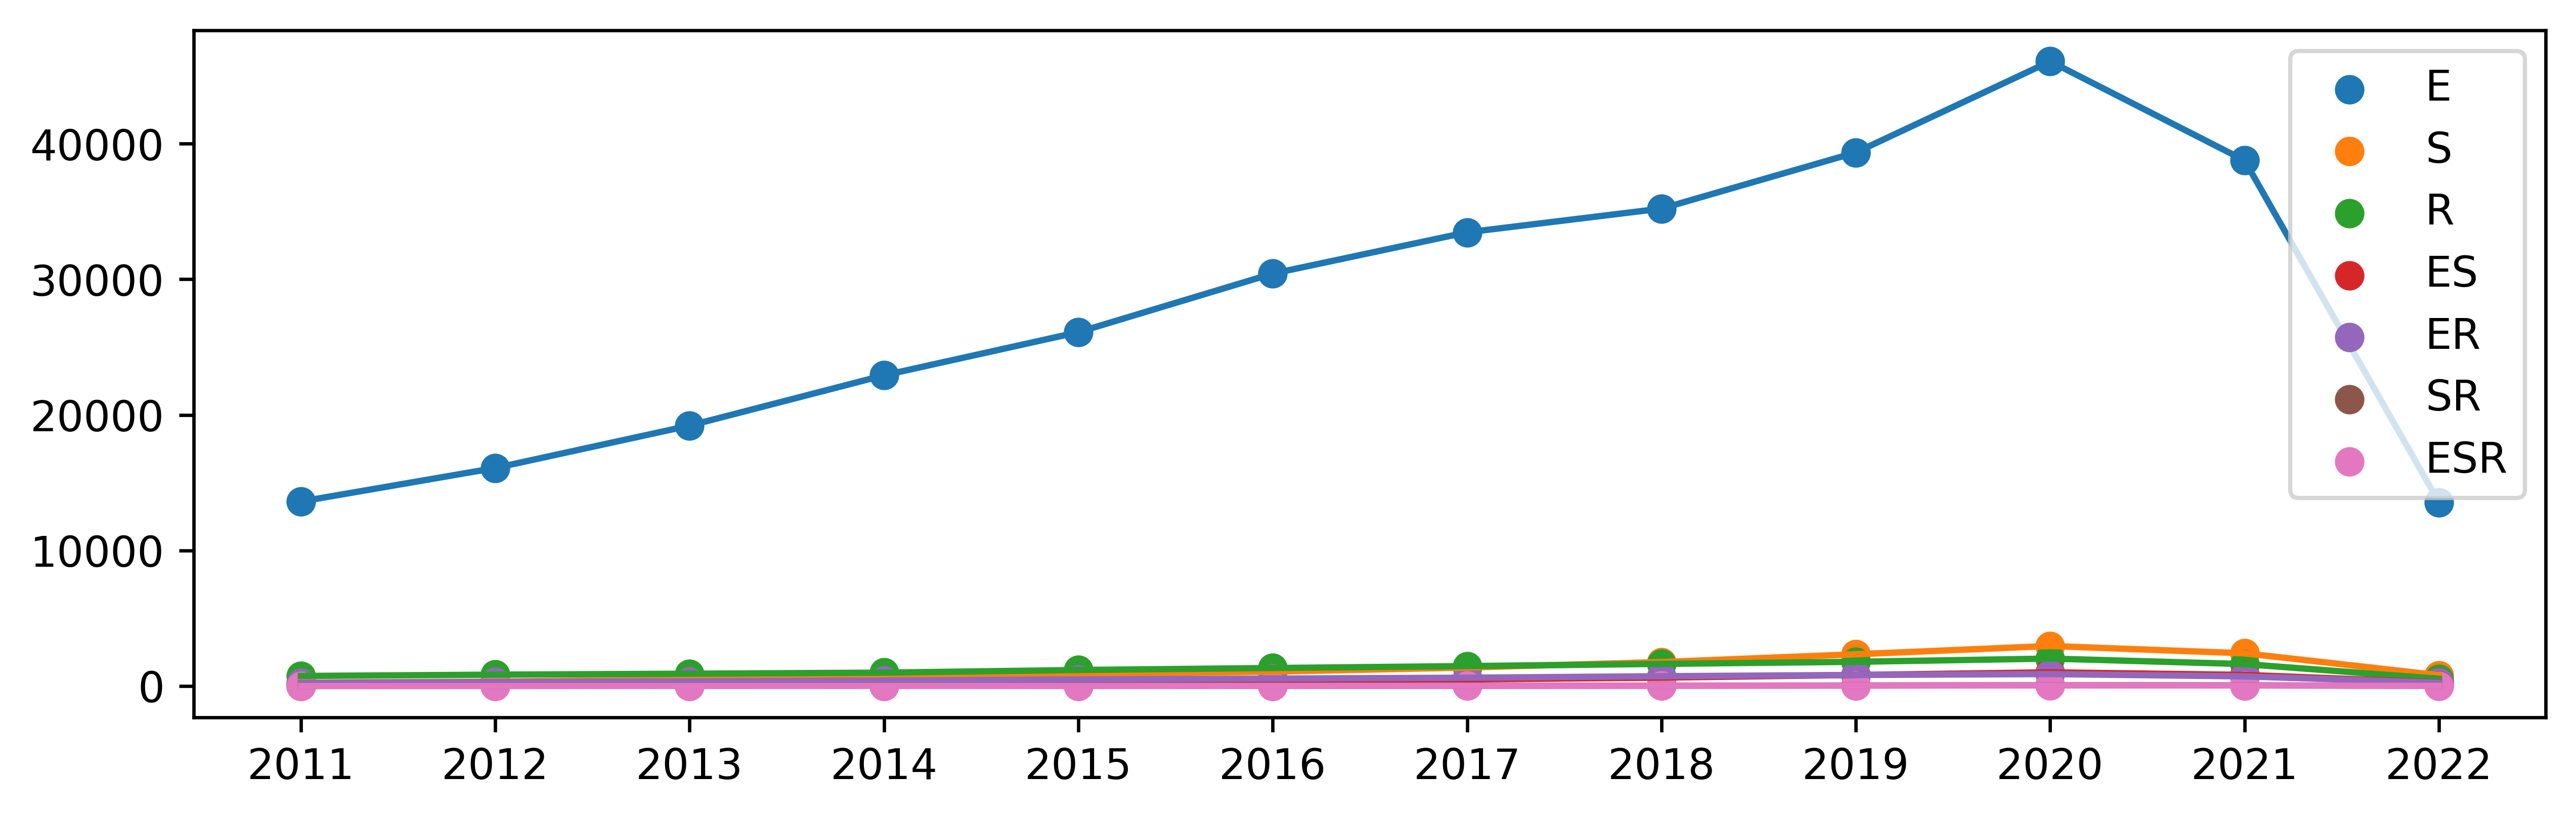

In [10]:
plt.close()
plt.subplots(figsize=(10,3), dpi=600)

for label in ['E', 'S', 'R', 'ES', 'ER', 'SR', 'ESR']:
    t_df = df[df['search'] == label]
    club_year = t_df['year'].tolist()
    num = t_df['num'].tolist()
    num_norm = t_df['num'].tolist()
    year = [i.split('-')[0] for i in club_year]
    
    plt.plot(year, num_norm)
    plt.scatter(year, num_norm, label=label)
#     for i in range(len(club_year)):
#         plt.annotate(num[i], (year[i], num_norm[i] + 0.1))
plt.legend(loc='upper right')
plt.show()

# Normalized

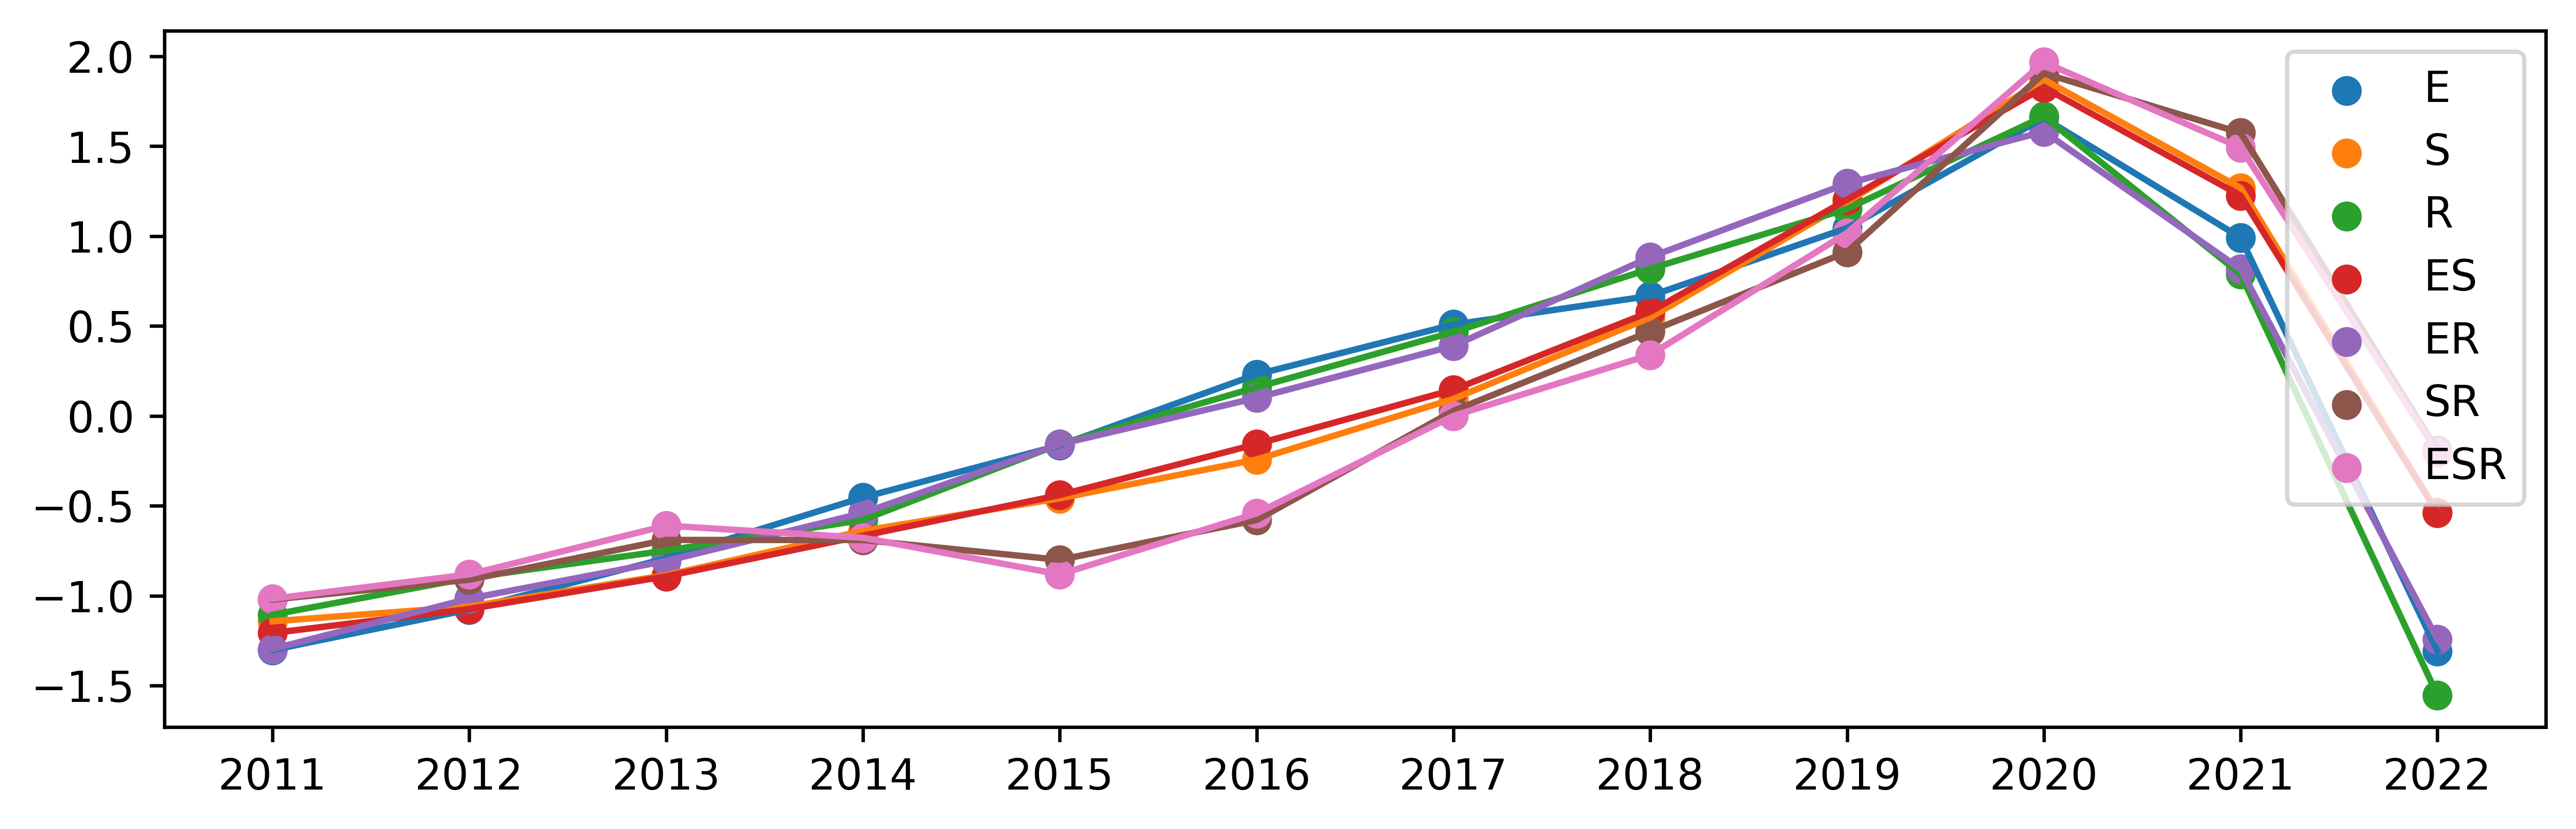

In [11]:
plt.close()
plt.subplots(figsize=(10,3), dpi=600)

for label in ['E', 'S', 'R', 'ES', 'ER', 'SR', 'ESR']:
    t_df = df[df['search'] == label]
    club_year = t_df['year'].tolist()
    num = t_df['num'].tolist()
    num_norm = t_df['norm'].tolist()
    year = [i.split('-')[0] for i in club_year]
    
    plt.plot(year, num_norm)
    plt.scatter(year, num_norm, label=label)
#     for i in range(len(club_year)):
#         plt.annotate(num[i], (year[i], num_norm[i] + 0.4))
plt.legend(loc='upper right')
plt.show()

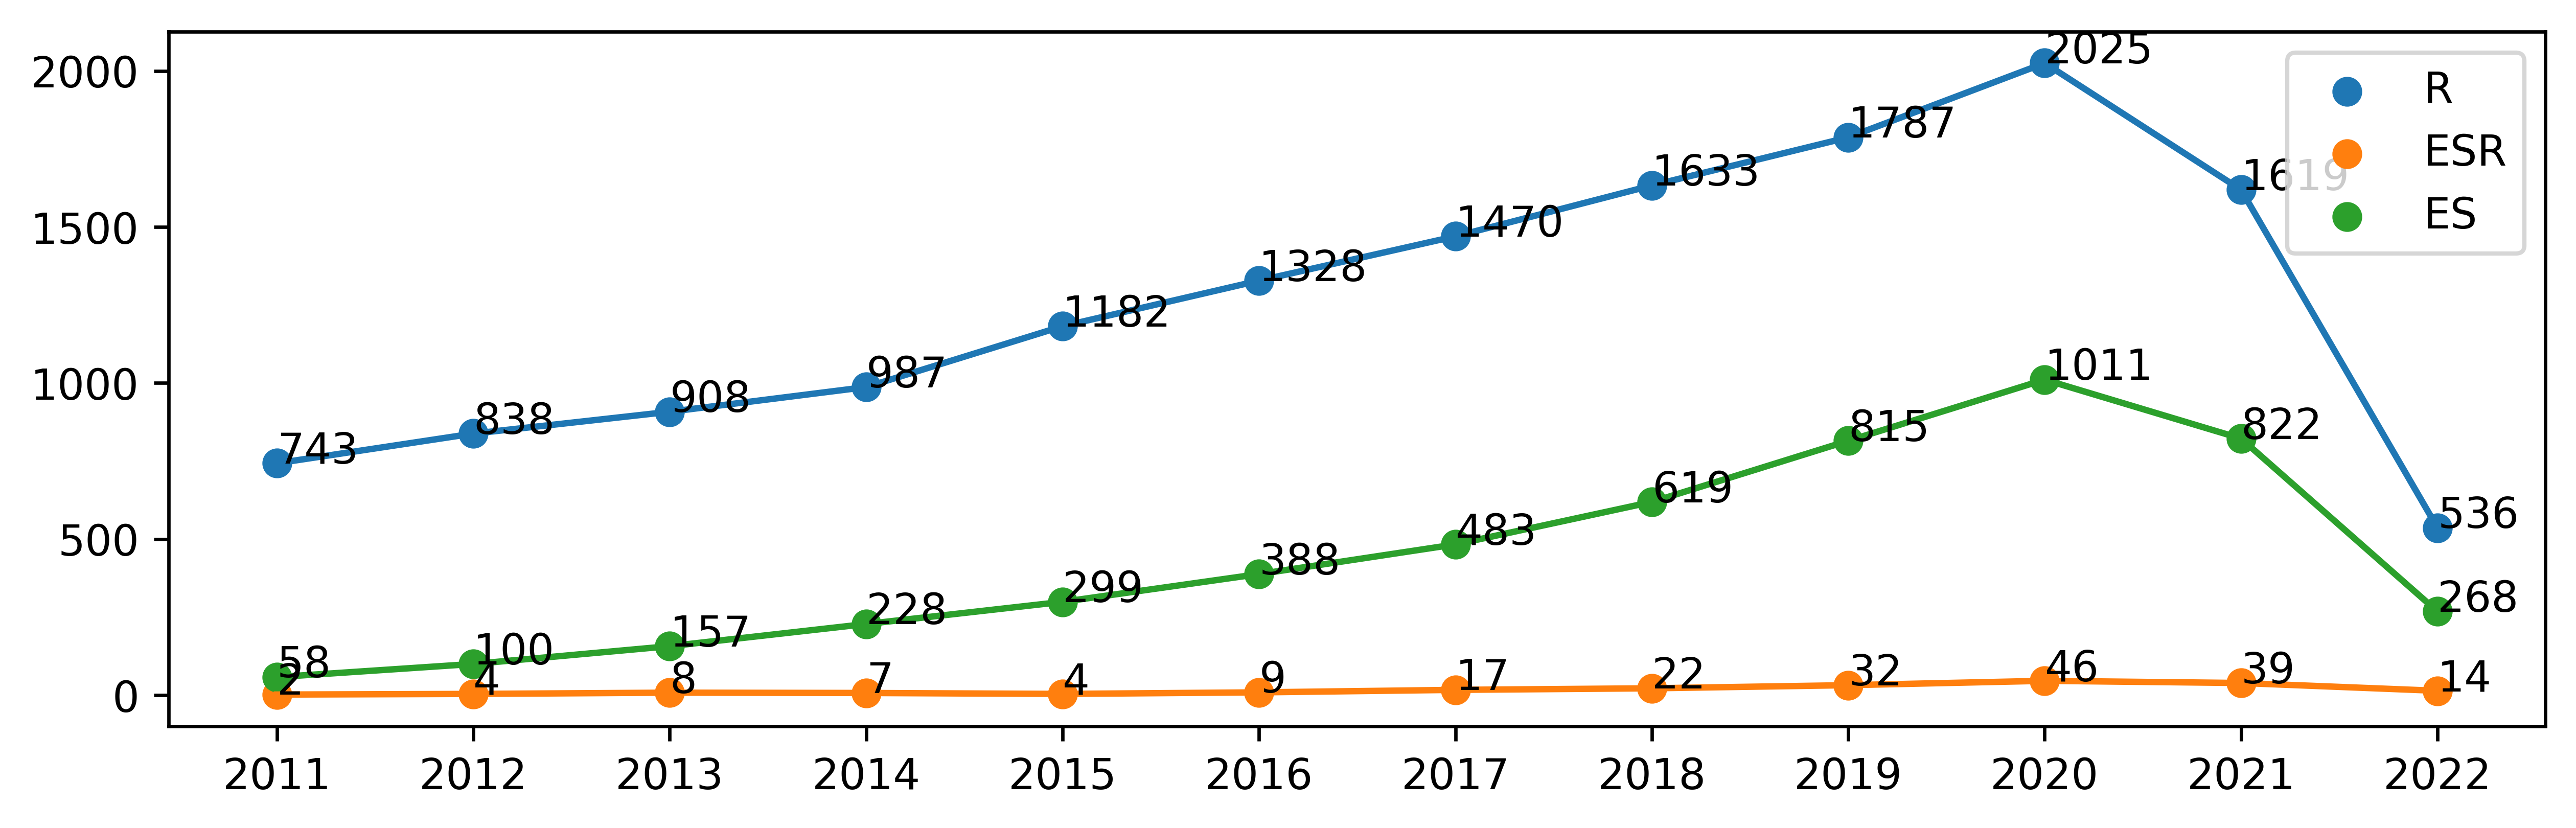

In [12]:
plt.close()
plt.subplots(figsize=(10,3), dpi=600)

for label in ['R', 'ESR', 'ES']:
    t_df = df[df['search'] == label]
    club_year = t_df['year'].tolist()
    num = t_df['num'].tolist()
    num_norm = t_df['num'].tolist()
    year = [i.split('-')[0] for i in club_year]
    
    plt.plot(year, num_norm)
    plt.scatter(year, num_norm, label=label)
    for i in range(len(club_year)):
        plt.annotate(num[i], (year[i], num_norm[i] + 0.1))
plt.legend(loc='upper right')
plt.show()

In [13]:
df_energy = df[df['search'] == 'E']
df_energy_rebound = df[df['search'] == 'ER']
df_rebound_in_energy = df_energy[['year', 'search', 'num']].merge(df_energy_rebound[['year', 'search', 'num']], on='year')
df_rebound_in_energy['RinE'] = (df_rebound_in_energy['num_y']*100)/df_rebound_in_energy['num_x']

In [14]:
df_es = df[df['search'] == 'ES']
df_esr = df[df['search'] == 'ESR']
df_rebound_in_es = df_es[['year', 'search', 'num']].merge(df_esr[['year', 'search', 'num']], on='year')
df_rebound_in_es['RinES'] = (df_rebound_in_es['num_y']*100)/df_rebound_in_es['num_x']

In [15]:
equations_df = df_rebound_in_energy[['year', 'RinE']].merge(df_rebound_in_es[['year', 'RinES']], on='year')

In [16]:
cmap = plt.get_cmap("Paired")

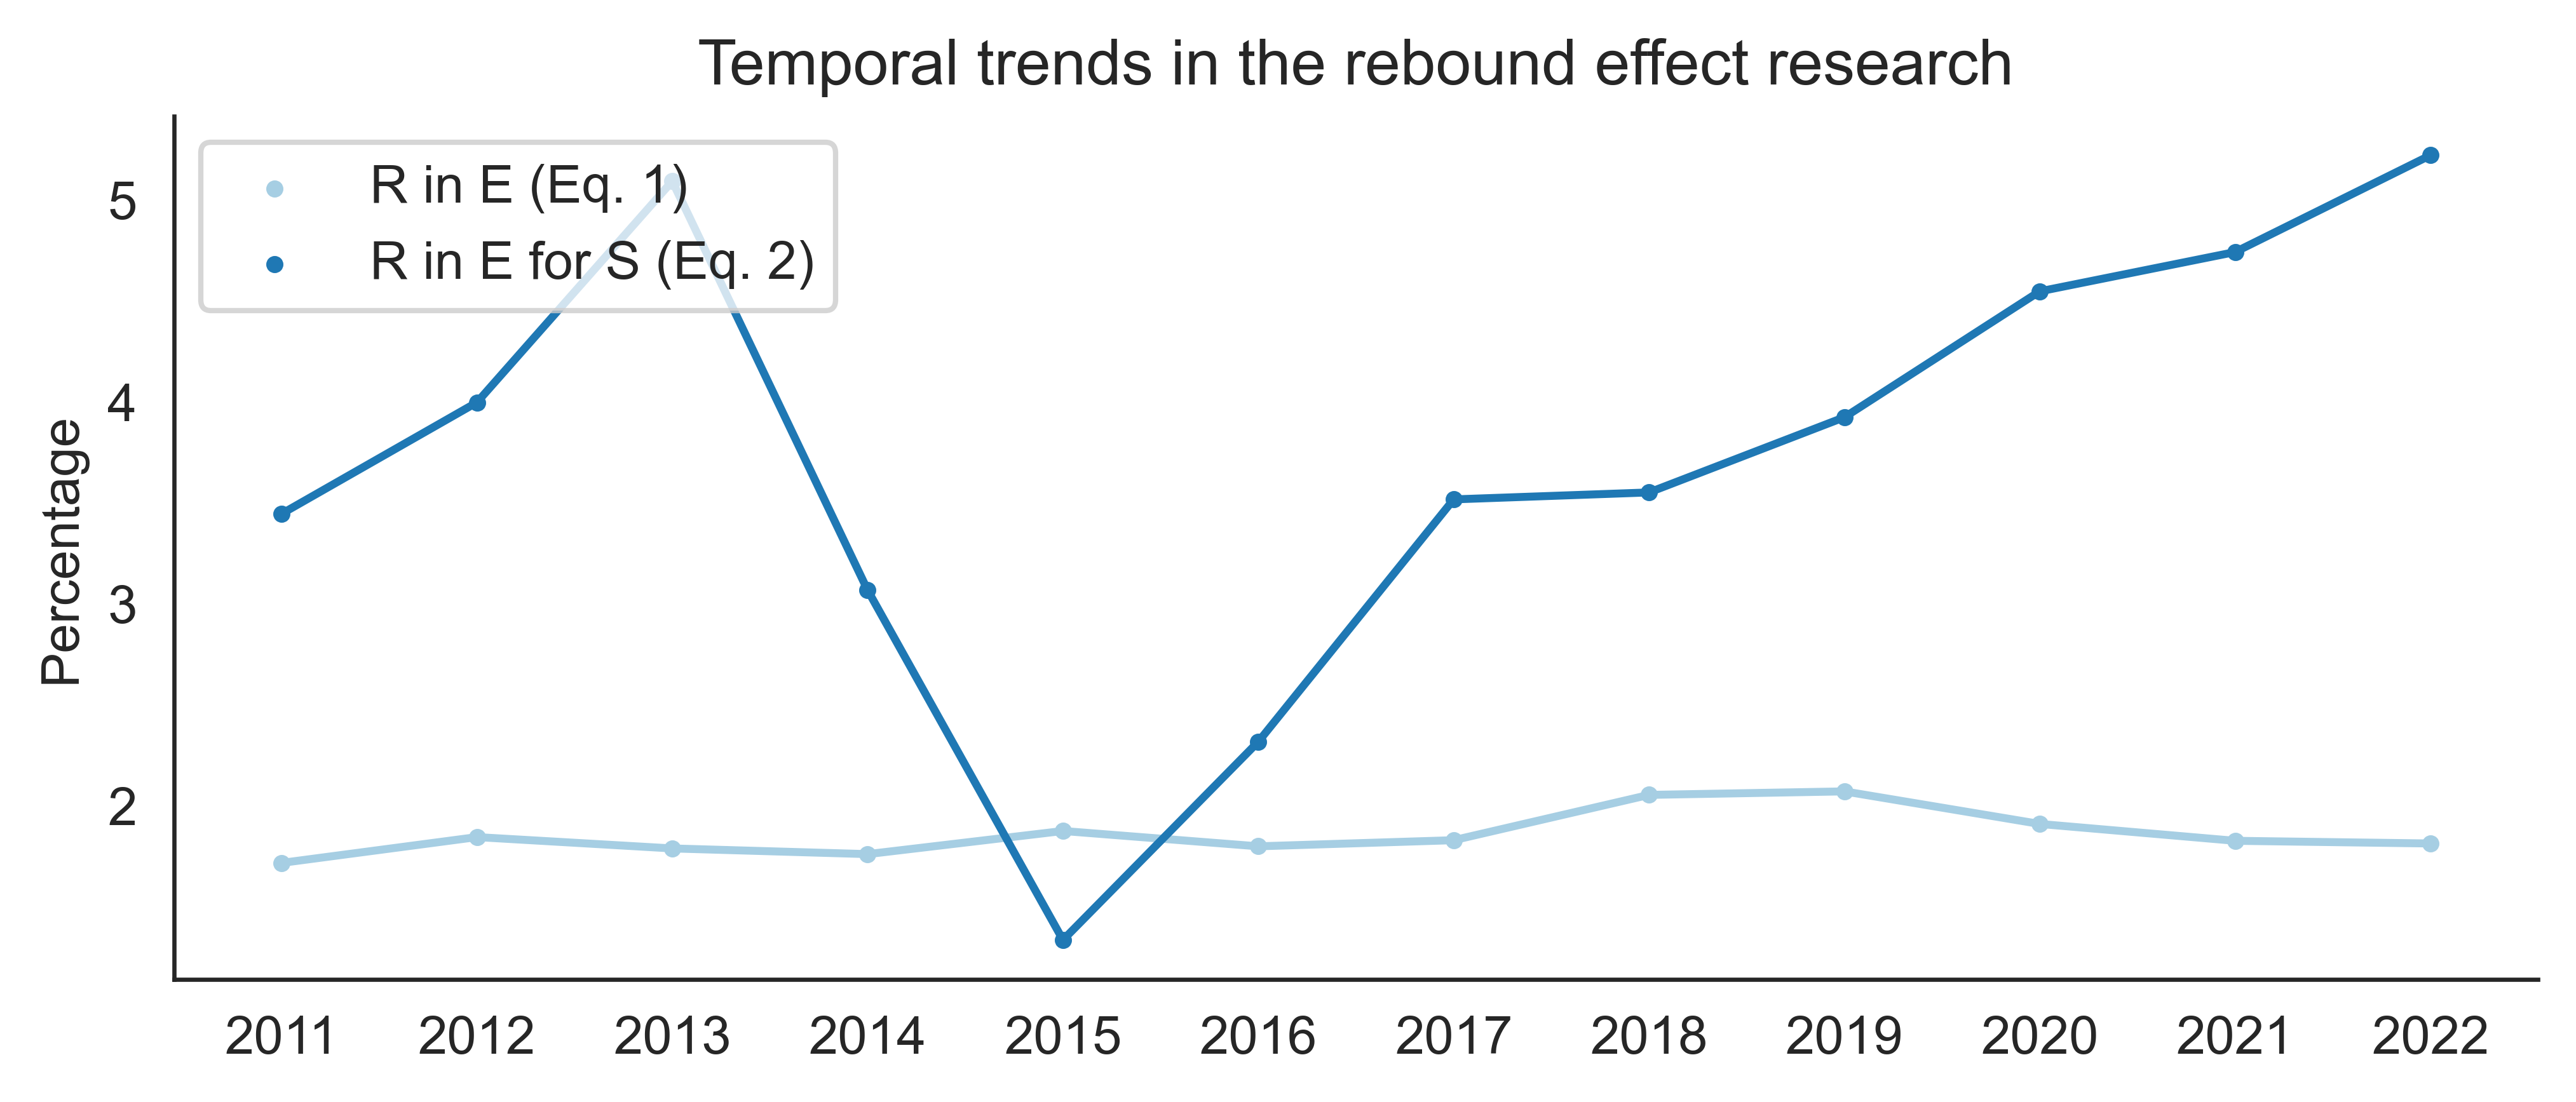

In [17]:
plt.close()
sns.set_style("white")

plt.subplots(figsize = (8,3), dpi=600)
x = [i.split('-')[0] for i in equations_df['year'].tolist()]

plt.plot(x, equations_df['RinE'], color=cmap(0))
plt.plot(x, equations_df['RinES'], color=cmap(1))
plt.scatter(x, equations_df['RinE'], label='R in E (Eq. 1)', color=cmap(0), s=5, marker='o')
plt.scatter(x, equations_df['RinES'], label='R in E for S (Eq. 2)', color=cmap(1), s=5, marker='o')

plt.legend(loc='upper left')
plt.ylabel("Percentage")
plt.title('Temporal trends in the rebound effect research')
sns.despine()

plt.show()

In [18]:
Eq. 1 = (E AND R) / E
Eq. 2 = (E AND S And R) / (E and S)

SyntaxError: invalid syntax (942142881.py, line 1)

In [ ]:
equations_df